In [33]:
import MDAnalysis
import numpy as np
from DEERPREdict.PRE import PREpredict
from DEERPREdict.DEER import DEERpredict
from DEERPREdict.utils import Operations
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import os

# HIV-1 Protease

Analysis of PDB structures with the 175 K rotamer library (46 conformers)

In [19]:
for pdb in ['3bvb','2bpx','1hhp','1tw7']:
    u = MDAnalysis.Universe('HIV-1PR/PDBs/{:s}.pdb'.format(pdb))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'])
    DEER.run(output_prefix = 'HIV-1PR/PDBs/'+pdb,filter_stdev=0.07)

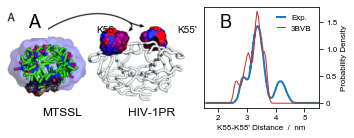

In [20]:
ax1 = plt.subplot2grid(shape=(1,5), loc=(0,0), colspan=3, fig=plt.figure(figsize=(5.2,2)))
ax2 = plt.subplot2grid((1,5), (0,3), colspan=2)

I = plt.imread('HIV-1PR/mtssl_hiv1-pr.tif')
ax1.imshow(I[:530], interpolation='bilinear')
ax1.axis('off')
r, p = np.loadtxt('HIV-1PR/exp/torbeev_d25n_dist.csv',unpack=True)
r = r/10
p = p/np.trapz(p,r)
bbox_props = dict(boxstyle='square', fc='w', ec='w', lw=4)
ax1.annotate('A',xy=(.08,.8),xycoords='figure fraction',bbox=bbox_props,fontsize=18)
ax2.annotate('B',xy=(.62,.8),xycoords='figure fraction',fontsize=18)
ax2.plot(r,p,color=plt.cm.tab10(0),lw=2,label='Exp.', ls='-')
ax2.set_yticks([0,.5,1.,1.5])
ax2.set_yticklabels([0,.5,1.0,1.5])
ax2.set_ylabel('Probability Density')
ax2.set_xlabel("K55-K55' Distance  /  nm")

ax1.annotate("K55",xy=(.27,.76),xycoords='figure fraction',fontsize=10)
ax1.annotate("K55'",xy=(.5,.76),xycoords='figure fraction',fontsize=10)
ax1.annotate("MTSSL",xy=(.12,.16),xycoords='figure fraction',fontsize=12)
ax1.annotate("HIV-1PR",xy=(.36,.16),xycoords='figure fraction',fontsize=12)
x, y = np.loadtxt('HIV-1PR/PDBs/3bvb-55-55.dat',unpack=True)
y = y/np.trapz(y,x)
ax2.plot(x,y,label='3BVB',color=plt.cm.tab10(3),lw=1,ls='-')
ax2.set_xlim(1.5,5.5)
ax2.legend(frameon=False, handlelength=1)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=2,h_pad=0)
plt.savefig('figs/fig1.png',dpi=300)

[0.09220922]


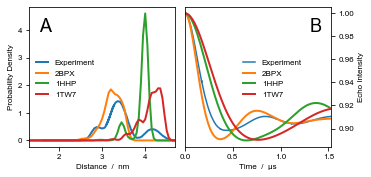

In [61]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

r, p = np.loadtxt('HIV-1PR/exp/torbeev_d25n_dist.csv',unpack=True)
r = r/10
p = p/np.trapz(p,r)
ax1.plot(r,p,label='Experiment',color=plt.cm.tab10(0),lw=2)
    
for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('HIV-1PR/PDBs/'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = sim.upper()
    ax1.plot(x,y,ls='-',label=sim,color=plt.cm.tab10(c),lw=2)

ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5,bbox_to_anchor=(0.5,0.3))
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

a = 0.0922

t,y = np.loadtxt('HIV-1PR/exp/torbeev_d25n_time.csv',unpack=True)
    
S = Operations.calcTimeDomain(t,r,p)
a,_ = curve_fit(lambda x,a : 1 + a*(x-1), S, y)
Vexp = 1+a*(S-1)
print(a)
ax2.plot(t,Vexp,color=plt.cm.tab10(0),ls='-',label='Experiment',lw=1.5)
    
for sim,c in zip(['2bpx','1hhp','1tw7'],[1,2,3]):
    x, y = np.loadtxt('HIV-1PR/PDBs/'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = sim.upper()
    V = 1+a*(y-1)
    ax2.plot(x,V,ls='-',label=sim,color=plt.cm.tab10(c),lw=2)

ax2.set_ylabel('Echo Intensity')
ax2.set_xlabel('Time  /  μs')
ax2.legend(frameon=False, handlelength=1.5, bbox_to_anchor=(0.35,0.3))
ax2.set_xlim(0,1.53)
ax1.annotate('A',xy=(.07,.82),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.85,.82),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('figs/figS2.png',dpi=300)

Analysis of unbiased and RDC-restrained simulations (175 K rotamer library)

In [5]:
for sim in ['unbiased','rdc']:
    u = MDAnalysis.Universe('HIV-1PR/sims/{:s}.pdb'.format(sim),
                            'HIV-1PR/sims/{:s}.xtc'.format(sim))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], 
                       temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix='HIV-1PR/sims/{:s}'.format(sim),filter_stdev=0.07)

[0.09220922]


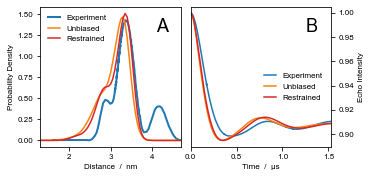

In [62]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

r, p = np.loadtxt('HIV-1PR/exp/torbeev_d25n_dist.csv',unpack=True)
r = r/10
p = p/np.trapz(p,r)
ax1.plot(r,p,label='Experiment',color=plt.cm.tab10(0),lw=2)

for sim,c in zip(['Unbiased','rdc'],[1,3]):
    x, y = np.loadtxt('HIV-1PR/sims/'+sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = 'Restrained' if sim=='rdc' else sim
    sim = 'PDB 3BVB' if sim=='3bvb' else sim
    ax1.plot(x,y,ls='-',label=sim.capitalize(),color=plt.cm.tab10(c),lw=1.5)

ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5)
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

t,y = np.loadtxt('HIV-1PR/exp/torbeev_d25n_time.csv',unpack=True)
    
S = Operations.calcTimeDomain(t,r,p)
a,_ = curve_fit(lambda x,a : 1 + a*(x-1), S, y)
Vexp = 1+a*(S-1)
print(a)
ax2.plot(t,Vexp,color=plt.cm.tab10(0),ls='-',label='Experiment',lw=1.5)

for sim,c in zip(['Unbiased','rdc'],[1,3]):
    x, y = np.loadtxt('HIV-1PR/sims/'+sim+'-55-55_time-domain.dat',unpack=True)
    sim = 'Restrained' if sim=='rdc' else sim
    V = 1+0.0922*(y-1)
    ax2.plot(x,V,ls='-',label=sim,color=plt.cm.tab10(c),lw=1.5)

ax2.set_ylabel('Echo Intensity')
ax2.set_xlabel('Time  /  μs')
ax2.legend(frameon=False, handlelength=1.5,bbox_to_anchor=(0.47,0.28))
ax2.set_xlim(0,1.53)
ax1.annotate('A',xy=(.82,.82),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.82,.82),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('figs/fig2.png',dpi=300)

# T4 Lysozyme

Analysis of the PDBs (175 K library)

In [9]:
for pdb in ['3dmv','2lcb','2lc9']:
    u = MDAnalysis.Universe('T4L/PDBs/{:s}.pdb'.format(pdb))
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
        DEER.run(output_prefix = 'T4L/PDBs/{:s}'.format(pdb), filter_stdev=0.07)

Analysis of metadynamics trajectories

In [10]:
if os.path.isfile('T4L/sims/MTDtriple.xtc'):
    bias = np.loadtxt('T4L/sims/MTDbias_triple.dat')
    u = MDAnalysis.Universe('T4L/sims/MTDtriple.pdb','T4L/sims/MTDtriple.xtc')
    print(u.trajectory.n_frames)
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues,
                           temperature = 298, z_cutoff = 0.05)
        DEER.run(output_prefix = 'T4L/sims/triple', filter_stdev=0.07, 
                 weights=np.exp(bias/(.298*8.3145)))

6868


In [11]:
if os.path.isfile('T4L/sims/MTDsingle.xtc'):
    bias = np.loadtxt('T4L/sims/MTDbias_single.dat')
    u = MDAnalysis.Universe('T4L/sims/MTDsingle.pdb','T4L/sims/MTDsingle.xtc')
    print(u.trajectory.n_frames)
    for residues in [[89, 109],[109, 140]]:
        DEER = DEERpredict(u, residues = residues, 
                           temperature = 298, z_cutoff = 0.05)
        DEER.run(output_prefix = 'T4L/sims/single', filter_stdev=0.07, 
                 weights=np.exp(bias/(.298*8.3145)))

6670


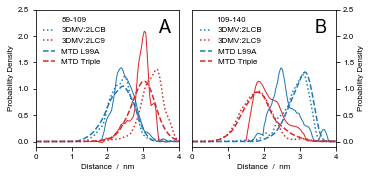

In [14]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for ax,residues in zip(axes,[[89, 109],[109, 140]]):
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.97+yE*.03
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(0),ls=':',label='3DMV:2LCB',lw=1.5)
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lc9-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.04+yE*.96
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(3),ls=':',label='3DMV:2LC9',lw=1.5)
    
    x, y = np.loadtxt('T4L/expLerch/{:d}-{:d}-L99A.csv'.format(residues[0],residues[1]),unpack=True)
    sortarg = np.argsort(x)
    x = x[sortarg]/10
    y = y[sortarg]
    y/=np.trapz(y,x)
    ax.plot(x,y,color=plt.cm.tab10(0),ls='-',lw=1)
    
    x, y = np.loadtxt('T4L/expLerch/{:d}-{:d}-triple.csv'.format(residues[0],residues[1]),unpack=True)
    x /= 10
    y /= np.trapz(y,x)
    ax.plot(x,y,color=plt.cm.tab10(3),ls='-',lw=1)
    
    xS, yS = np.loadtxt('T4L/sims/single-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yS/np.trapz(yS,xS)
    ax.plot(xS,lc,color=plt.cm.tab10(0),ls='--',label=r'MTD L99A',lw=1.5)
    
    xS, yS = np.loadtxt('T4L/sims/triple-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yS/np.trapz(yS,xS)
    ax.plot(xS,lc,color=plt.cm.tab10(3),ls='--',label=r'MTD Triple',lw=1.5)
    
    ax.set_xlim(0,4)
    ax.set_ylim(-.1,2.5)
    ax.legend(frameon=False,title='{:d}-{:d}'.format(residues[0],residues[1]),
              handlelength=1.5,loc='upper left')
    ax.set_ylabel('Probability Density')
    ax.set_xlabel('Distance  /  nm')
    
axes[0].annotate('A',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].annotate('B',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.set_ticks_position('right')
plt.tight_layout()
plt.savefig('figs/fig3.png',dpi=300)

#### Bayesian/maximum entropy reweighting (Fig. S3)

In [17]:
# PDB structures
pdb3dmv = MDAnalysis.Universe('T4L/PDBs/3dmv.pdb')
pdb2lcb = MDAnalysis.Universe('T4L/PDBs/2lcb.pdb')

Simulated annealing

In [ ]:
%%time
# experimental data
x,y = np.loadtxt('T4L/expLerch/{:d}-{:d}-L99A.txt'.format(109,140),unpack=True)
# PDB structures
pdb3dmv = MDAnalysis.Universe('T4L/PDBs/3dmv.pdb')
pdb2lcb = MDAnalysis.Universe('T4L/PDBs/2lcb.pdb')

for kT0 in [10]:
    for theta in [5]:
        # initial weights
        w0 = np.loadtxt('../../DEERPREdict/lib/MTSSL_175K_X1X2_46_weights.txt')
        w0 /= w0.sum()
        w = w0
        w1 = w

        kT = kT0

        temp_list = [kT]
        cost_list = [0]
        iter_list = [1]
        phi_list = [1]
        for k in range(1,10000):
            # nudge the weights
            w1 = w + np.random.normal(0,0.001,w.size)
            w1 /= w1.sum()
            while np.any(w1<0):
                w1 = w + np.random.normal(0,0.001,w.size)
                w1 /= w1.sum()
            np.savetxt('../../DEERPREdict/lib/MTSSL_175K_X1X2_46_weights.txt',w1)

            # DEER calculation
            DEER = DEERpredict(pdb3dmv, residues = [109, 140], temperature = 298)
            DEER.run(output_prefix = 'T4L/PDBs/3dmv')
            
            # DEER calculation
            DEER = DEERpredict(pdb2lcb, residues = [109, 140], temperature = 298)
            DEER.run(output_prefix = 'T4L/PDBs/2lcb')

            # calculated data
            xc, yc1 = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(109, 140),unpack=True)
            xc, yc2 = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(109, 140),unpack=True)
            yc = yc1*.97+yc2*.03
            yc /= np.trapz(yc,xc)
            
            fpr = interp1d(x, y, kind='cubic',bounds_error=False,fill_value=0)
            yexp = fpr(xc)

            # BME
            chi2 = np.power(yc-yexp,2).sum()
            entropy = -np.sum(w1*np.log(w1/w0))
            cost = chi2 - theta*entropy

            delta = cost - cost_list[-1]
            
            kT *= .99
            if (np.exp(-delta/kT) > np.random.rand()):
                
                w=w1
                temp_list.append(kT)
                cost_list.append(cost)
                iter_list.append(k)
                phi_list.append(np.exp(entropy))
        np.savetxt('T4L/bme/weights_{:d}_{:.1f}.txt'.format(kT0,theta),
                   np.c_[w0,w])
        np.savetxt('T4L/bme/temp_{:d}_{:.1f}.txt'.format(kT0,theta),
                   np.c_[iter_list,temp_list])
        np.savetxt('T4L/bme/cost_{:d}_{:.1f}.txt'.format(kT0,theta),
                   np.c_[iter_list,cost_list])
        np.savetxt('T4L/bme/phi_{:d}_{:.1f}.txt'.format(kT0,theta),
                   np.c_[iter_list,phi_list])

w0,w = np.loadtxt('T4L/bme/weights_{:d}_{:.1f}.txt'.format(10,4),unpack=True)
np.savetxt('../../DEERPREdict/lib/MTSSL_175K_X1X2_46_weights.txt',w0)

theta=4 single 2.7935479638734906
theta=4 triple 11.987152423103483
wO single 1.0305992252991836
wO triple 14.226148445491955
theta=4 single 1.67518003516293
theta=4 triple 7.026717053301246
wO single 9.94489423566044
wO triple 4.849385355062008


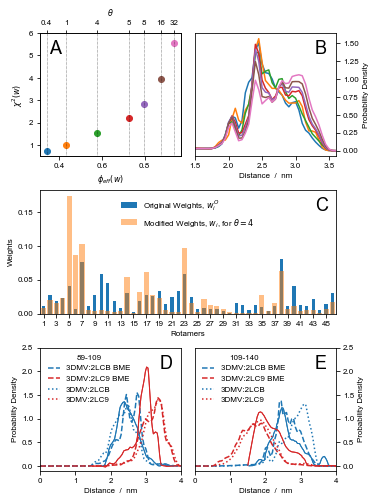

In [64]:
def plotDist(ax,w,label):
    w /= w.sum()
    x,y = np.loadtxt('T4L/expLerch/{:d}-{:d}-L99A.txt'.format(109,140),unpack=True)
    np.savetxt('../../DEERPREdict/lib/MTSSL_175K_X1X2_46_weights.txt',w)
    # DEER calculation
    DEER = DEERpredict(pdb3dmv, residues = [109, 140], temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/3dmv')

    # DEER calculation
    DEER = DEERpredict(pdb2lcb, residues = [109, 140], temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/2lcb')

    # calculated data
    xc, yc1 = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(109, 140),unpack=True)
    xc, yc2 = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(109, 140),unpack=True)
    yc = yc1*.97+yc2*.03
    yc /= np.trapz(yc,xc)
    if label=='Initial':
        ax.plot(xc,yc,label=label,c='k')
    else:
        ax.plot(xc,yc,label=label)
        
ax1 = plt.subplot2grid(shape=(3,2), loc=(0,0), colspan=1, fig=plt.figure(figsize=(5.2,7)))
ax2 = plt.subplot2grid((3,2), (0,1), colspan=1)
ax3 = plt.subplot2grid((3,2), (1,0), colspan=2)
ax4 = plt.subplot2grid((3,2), (2,0), colspan=1)
ax5 = plt.subplot2grid((3,2), (2,1), colspan=1)

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

ax1b = ax1.twiny()
final_phi = []
final_chi2 = []
for theta in [.4,1,4,5,8,16,32]: 
    a,cost = np.loadtxt('T4L/expLerch/cost_{:d}_{:.1f}.txt'.format(10,theta),unpack=True)
    a,phi = np.loadtxt('T4L/expLerch/phi_{:d}_{:.1f}.txt'.format(10,theta),unpack=True)
    w0,w = np.loadtxt('T4L/expLerch/weights_{:d}_{:.1f}.txt'.format(10,theta),unpack=True)
    final_chi2.append(cost[-1]+theta*np.log(phi[-1]))
    final_phi.append(phi[-1])
    ax1.plot(phi[-1],cost[-1]+theta*np.log(phi[-1]),lw=0,marker='o')
    plotDist(ax2,w,label=r'$\theta={:.1f}$'.format(theta))
ax4.legend(frameon=False)

w0,w = np.loadtxt('T4L/expLerch/weights_{:d}_{:.1f}.txt'.format(10,4),unpack=True)
ax3.bar(np.arange(.5,46,1),w0,width=.5,label=r'Original Weights, $w_i^O$')
ax3.bar(np.arange(.5,46,1),w,width=.8,alpha=.5,label=r'Modified Weights, $w_i$, for $\theta=4$')
ax3.set_xticks(np.arange(1,47,1)[::2]-.5)
ax3.set_xticklabels(np.arange(1,47,1)[::2])
ax3.legend(frameon=False)
ax3.set_xlim(0,46)
ax3.set_xlabel('Rotamers')
ax3.set_ylabel('Weights')
    
ax1.set_ylabel(r'$\chi^2(w)$')
ax1.set_xlabel(r'$\phi_{eff}(w)$')
ax1b.set_xlabel(r'$\theta$')
ax1b.set_xticks(final_phi)
ax1b.set_xticklabels([.4,1,4,5,8,16,32])
ax1.set_ylim(0.5,6)
ax1b.vlines(final_phi,.5,12,lw=0.5,ls=':')

ax2.set_ylabel(r'Probability Density')
ax2.set_xlim(1.5,3.6)

ax4.set_xlabel(r'Distance  /  nm')
ax5.set_xlabel(r'Distance  /  nm')
ax2.set_xlabel(r'Distance  /  nm')

axes = [ax4,ax5]

for ax,residues in zip(axes,[[89, 109],[109, 140]]):

    w0,w = np.loadtxt('T4L/bme/weights_{:d}_{:.1f}.txt'.format(10,4),unpack=True)
    np.savetxt('../../DEERPREdict/lib/MTSSL_175K_X1X2_46_weights.txt',w)
    
    # DEER calculation
    DEER = DEERpredict(MDAnalysis.Universe('T4L/PDBs/3dmv.pdb'), residues = residues, temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/3dmv')

    # DEER calculation
    DEER = DEERpredict(MDAnalysis.Universe('T4L/PDBs/2lcb.pdb'), residues = residues, temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/2lcb')
    
    # DEER calculation
    DEER = DEERpredict(MDAnalysis.Universe('T4L/PDBs/2lc9.pdb'), residues = residues, temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/2lc9')

    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.97+yE*.03
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(0),ls='--',label='3DMV:2LCB BME',lw=1.5)
    
    # experimental data
    x, y = np.loadtxt('T4L/expLerch/{:d}-{:d}-L99A.csv'.format(residues[0],residues[1]),unpack=True)
    sortarg = np.argsort(x)
    x = x[sortarg]/10
    y = y[sortarg]/np.trapz(y,x)
    ###
    fpr = interp1d(x, y, kind='cubic',bounds_error=False,fill_value=0)
    yexp = fpr(xE)
    print('theta=4 single',np.power(lc-yexp,2).sum())
    ax.plot(x,y,color=plt.cm.tab10(0),ls='-',lw=1)
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lc9-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.04+yE*.96
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(3),ls='--',label='3DMV:2LC9 BME',lw=1.5)
    
    # experimental data
    x, y = np.loadtxt('T4L/expLerch/{:d}-{:d}-triple.csv'.format(residues[0],residues[1]),unpack=True)
    x /= 10
    y /= np.trapz(y,x)
    ###
    fpr = interp1d(x, y, kind='cubic',bounds_error=False,fill_value=0)
    yexp = fpr(xE)
    print('theta=4 triple',np.power(lc-yexp,2).sum())
    ax.plot(x,y,color=plt.cm.tab10(3),ls='-',lw=1)
    
    w0,w = np.loadtxt('T4L/bme/weights_{:d}_{:.1f}.txt'.format(10,4),unpack=True)
    np.savetxt('../../DEERPREdict/lib/MTSSL_175K_X1X2_46_weights.txt',w0)
    
    # DEER calculation
    DEER = DEERpredict(MDAnalysis.Universe('T4L/PDBs/3dmv.pdb'), residues = residues, temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/3dmv')

    # DEER calculation
    DEER = DEERpredict(MDAnalysis.Universe('T4L/PDBs/2lcb.pdb'), residues = residues, temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/2lcb')
    
    # DEER calculation
    DEER = DEERpredict(MDAnalysis.Universe('T4L/PDBs/2lc9.pdb'), residues = residues, temperature = 298)
    DEER.run(output_prefix = 'T4L/PDBs/2lc9')

    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.97+yE*.03
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(0),ls=':',label='3DMV:2LCB',lw=1.5)
    
    # experimental data
    x, y = np.loadtxt('T4L/expLerch/{:d}-{:d}-L99A.csv'.format(residues[0],residues[1]),unpack=True)
    sortarg = np.argsort(x)
    x = x[sortarg]/10
    y = y[sortarg]/np.trapz(y,x)
    ###
    fpr = interp1d(x, y, kind='cubic',bounds_error=False,fill_value=0)
    yexp = fpr(xE)
    print('wO single',np.power(lc-yexp,2).sum())
    ax.plot(x,y,color=plt.cm.tab10(0),ls='-',lw=1)
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lc9-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.04+yE*.96
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(3),ls=':',label='3DMV:2LC9',lw=1.5)
    
    # experimental data
    x, y = np.loadtxt('T4L/expLerch/{:d}-{:d}-triple.csv'.format(residues[0],residues[1]),unpack=True)
    x /= 10
    y /= np.trapz(y,x)
    ###
    fpr = interp1d(x, y, kind='cubic',bounds_error=False,fill_value=0)
    yexp = fpr(xE)
    print('wO triple',np.power(lc-yexp,2).sum())
    ax.plot(x,y,color=plt.cm.tab10(3),ls='-',lw=1)
    
    ax.set_xlim(0,4)
    ax.set_ylim(-.1,2.5)
    ax.legend(frameon=False,title='{:d}-{:d}'.format(residues[0],residues[1]),
              handlelength=1.5,loc='upper left')
    ax.set_ylabel('Probability Density')
    ax.set_xlabel('Distance  /  nm')

axes[0].annotate('D',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].annotate('E',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.set_ticks_position('right')

ax1.annotate('A',xy=(.06,.83),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
ax3.annotate('C',xy=(.93,.83),xycoords='axes fraction',fontsize=18)
ax1.legend(frameon=False)
ax3.legend(frameon=False,loc='upper center')
ax4.legend(frameon=False,title='89-109',handlelength=1.5,loc='upper left')
ax5.legend(frameon=False,loc='upper left',title='109-140',handlelength=1.5)

ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position("right")
ax5.yaxis.set_ticks_position('right')
ax5.yaxis.set_label_position("right")
plt.tight_layout(h_pad=.5)
plt.savefig('figs/figS3.png',dpi=600)
plt.show()

# Acyl-CoA-Binding Protein

175 K rotamer library (46 conformers)

In [53]:
u = MDAnalysis.Universe('ACBP/1nti.pdb')
for res in [17,36,46,65,86]:
    PRE = PREpredict(u, res, temperature = 298, Cbeta = False, 
                     atom_selection = 'H')
    PRE.run(tau_c = 2e-09, tau_t = 2*1e-10, 
            delay = 1e-2, r_2 = 12.6, wh = 750, output_prefix = 'ACBP/res')

In [54]:
def load_expPREs(path,labels):
    data = {}
    for label in labels:
        resnums, data[label] = np.loadtxt(path+'/exp{:d}.dat'.format(label),unpack=True)
    df = pd.DataFrame(data,index=resnums)
    df.rename_axis('residue', inplace=True)
    df.rename_axis('label', axis='columns',inplace=True)
    return resnums, df
labels = [17,36,46,65,86]
resnums, expPREs = load_expPREs('ACBP/exp',labels)

In [55]:
def calcIratio(tau_c,args,load_file=False,z_cutoff=0.05):
    u, label, tau_t, r_2, Cbeta = args
    PRE = PREpredict(u, label, temperature = 298, Cbeta = Cbeta, 
                     atom_selection = 'H', z_cutoff=z_cutoff)
    load_file = 'ACBP/res-{:d}.pkl'.format(label) if load_file else load_file
    PRE.run(output_prefix = 'ACBP/res', load_file = load_file, tau_t = tau_t*1e-9, 
        delay = 10e-3, tau_c = tau_c*1e-09, r_2 = r_2, wh = 750)
    calcPREs = np.loadtxt('ACBP/res-{:d}.dat'.format(label))[:,1]
    chi2 = np.power(calcPREs - expPREs[label],2).sum() / expPREs[label].count()
    ndx = expPREs[(expPREs[label]>.1)&(expPREs[label]<.9)].index.astype(int)
    chi2DR = np.power(calcPREs[ndx-1] - expPREs.loc[ndx,label],2).sum() / expPREs.loc[ndx,label].count()
    return chi2, chi2DR

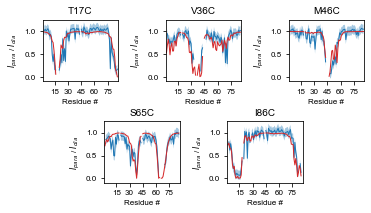

In [56]:
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=plt.figure(figsize=(5.2,3)))
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

axes = [ax1,ax2,ax3,ax4,ax5]

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for ax,label,res in zip(axes,[17,36,46,65,86],'TVMSI'):
    ax.plot(resnums, expPREs[label], color=plt.cm.tab10(0), lw=1)
    ax.fill_between(resnums, expPREs[label]-.1, expPREs[label]+.1,alpha=.4, 
                    lw=0, color=plt.cm.tab10(0))
    resnums, calcPREs, _ = np.loadtxt('ACBP/res-{:d}.dat'.format(label),unpack=True)
    ax.plot(resnums, calcPREs, color=plt.cm.tab10(3),lw=1)
    ax.set_ylabel('$I_{para}$ / $I_{dia}$')
    ax.set_ylim(-.1,1.25)
    ax.set_xlim(1,resnums.size+1)
    ax.set_xticks(range(0,resnums.size+1,15)[1:])
    ax.set_xlabel('Residue #')
    ax.set_title(res+str(label)+'C',fontsize=10)
plt.tight_layout(w_pad=1.5,h_pad=0.5)
plt.savefig('figs/fig4.png',dpi=300)
plt.show()

Steric partition functions –– 175 K rotamer library (46 conformers)

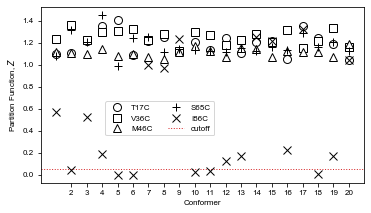

In [57]:
fig = plt.figure(figsize=(5.2,3))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})
for label,res,m in zip([17,36,46,65,86],'TVMSI','os^+x'):
    z = np.loadtxt('ACBP/res-Z-{:d}.dat'.format(label))
    plt.plot(range(1,21),z,marker=m,lw=0,color='k',ms=8,mfc='w',label=res+str(label)+'C')
plt.xticks(range(2,21,1),['{:d}'.format(i) for i in range(2,21,1)])
plt.hlines(0.05,0,21,ls=':',lw=1,color=plt.cm.tab10(3),label='cutoff')
plt.legend(ncol=2,loc=(.2,.27))
plt.xlim(0,21)
plt.xlabel('Conformer')
plt.ylabel('Partition Function, $Z$')
plt.tight_layout()
plt.savefig('figs/figS4.png',dpi=300)
plt.show()

Comparison with C$\beta$-based PRE Predictions

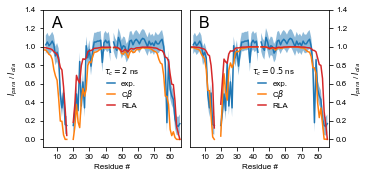

In [58]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

label=17
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})
ax1.plot(resnums, expPREs[label], color=plt.cm.tab10(0), label='exp.')
ax1.fill_between(resnums, expPREs[label]-.1, expPREs[label]+.1,alpha=.5, lw=0, 
                 color=plt.cm.tab10(0))
calcIratio(2,[u, label, 0.5, 12.6, True])
resnums, calcPREs, _ = np.loadtxt('ACBP/res-{:d}.dat'.format(label),unpack=True)
ax1.plot(resnums, calcPREs, color=plt.cm.tab10(1), label=r'C$\beta$')

calcIratio(2,[u, label, 0.5, 12.6, False])
resnums, calcPREs, _ = np.loadtxt('ACBP/res-{:d}.dat'.format(label),unpack=True)
ax1.plot(resnums, calcPREs, color=plt.cm.tab10(3), label='RLA',lw=1.5)

ax1.legend(frameon=False,title=r'$\tau_c=2$ ns',handlelength=1,labelspacing=.2,loc=(.42,.25))

ax2.plot(resnums, expPREs[label], color=plt.cm.tab10(0), label='exp.')
ax2.fill_between(resnums, expPREs[label]-.1, expPREs[label]+.1,alpha=.5, lw=0, 
                 color=plt.cm.tab10(0))
calcIratio(0.5,[u, label, 0.5, 12.6, True])
resnums, calcPREs, _ = np.loadtxt('ACBP/res-{:d}.dat'.format(label),unpack=True)
ax2.plot(resnums, calcPREs, color=plt.cm.tab10(1), label=r'C$\beta$',lw=1.5)

calcIratio(0.5,[u, label, 0.5, 12.6, False])
resnums, calcPREs, _ = np.loadtxt('ACBP/res-{:d}.dat'.format(label),unpack=True)
ax2.plot(resnums, calcPREs, color=plt.cm.tab10(3), label='RLA',lw=1.5)
ax2.legend(frameon=False,title=r'$\tau_c=0.5$ ns',handlelength=1,labelspacing=.2,loc=(.42,.25))

for ax in [ax1,ax2]:
    ax.set_ylabel('$I_{para}$ / $I_{dia}$')
    ax.set_ylim(-.08,1.4)
    ax.set_xlim(1,resnums.size+1)
    ax.set_xticks(range(0,resnums.size+1,10)[1:])
    ax.set_xlabel('Residue #')
ax1.annotate('A',xy=(.06,.87),xycoords='axes fraction',fontsize=16)
ax2.annotate('B',xy=(.06,.87),xycoords='axes fraction',fontsize=16)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout()
plt.savefig('figs/figS5.png',dpi=300)
plt.show()

Influence of $\tau_C$ on $\chi^2$

mkdir: ACBP/chi2tau_c: File exists


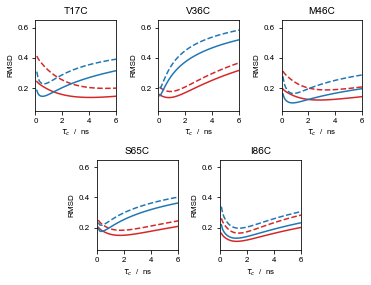

In [60]:
!mkdir ACBP/chi2tau_c

for label in labels:
    chi2 = []
    chi2.append(calcIratio(.1, [u, label, 0.5, 12.6,  False]))
    for tau_c in np.arange(.2,8,.1):
        chi2.append(calcIratio(tau_c, [u, label, 0.5, 12.6,  False],True))
    np.savetxt('ACBP/chi2tau_c/chi2RLA{:d}.dat'.format(label),np.c_[np.arange(.1,8,.1),chi2])

for label in labels:
    chi2 = []
    chi2.append(calcIratio(.1, [u, label, 0.5, 12.6,  True]))
    for tau_c in np.arange(.2,8,.1):
        chi2.append(calcIratio(tau_c, [u, label, 0.5, 12.6,  True],True))
    np.savetxt('ACBP/chi2tau_c/chi2Cbeta{:d}.dat'.format(label),
               np.c_[np.arange(.1,8,.1),chi2])
    
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=plt.figure(figsize=(5.2,4)))
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axes = [ax1,ax2,ax3,ax4,ax5]
for ax,label,res in zip(axes,labels,'TVMSI'):
    tau_c,chi2,chi2DR = np.loadtxt('ACBP/chi2tau_c/chi2RLA{:d}.dat'.format(label),unpack=True)
    ax.plot(tau_c,np.sqrt(chi2), color=plt.cm.tab10(3), label='RLA')
    ax.plot(tau_c,np.sqrt(chi2DR), color=plt.cm.tab10(3), ls='--', label='RLA dyn. range')
    tau_c,chi2,chi2DR = np.loadtxt('ACBP/chi2tau_c/chi2Cbeta{:d}.dat'.format(label),unpack=True)
    ax.plot(tau_c,np.sqrt(chi2), color=plt.cm.tab10(0), label=r'C$\beta$')
    ax.plot(tau_c,np.sqrt(chi2DR), color=plt.cm.tab10(0), ls='--', 
            label=r'C$\beta$ dyn. range')
    ax.set_title(res+str(label)+'C',fontsize=10)
    ax.set_xlabel(r'$\tau_c$  /  ns')
    ax.set_ylabel(r'RMSD')
    ax.set_ylim(.05,.65)
    ax.set_xlim(0,6)
plt.tight_layout(w_pad=1.5)
plt.savefig('figs/figS6.png',dpi=300)

Influence of the $Z$ cutoff on DEER and PRE predictions

In [39]:
u = MDAnalysis.Universe('ACBP/1nti.pdb')
for z_cutoff in [0.05,0.5,0.8]:
    PRE = PREpredict(u, 86, temperature = 298, Cbeta = False, atom_selection = 'H', z_cutoff = z_cutoff)
    PRE.run(output_prefix = 'ACBP/calcPREs/res{:g}'.format(z_cutoff), tau_c = 2e-09,
            tau_t = 2*1e-10, delay = 1e-2, r_2 = 12.6, wh = 750)

In [40]:
for z_cutoff in [0.05,0.5,0.8]:
    u = MDAnalysis.Universe('HIV-1PR/sims/rdc.pdb'.format(sim),'HIV-1PR/sims/rdc.xtc'.format(sim))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], temperature = 298, z_cutoff = z_cutoff)
    DEER.run(output_prefix='HIV-1PR/sims/rdc{:g}'.format(z_cutoff))

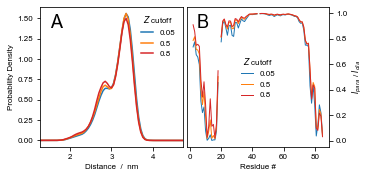

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for z_cutoff,c in zip(['0.05','0.5','0.8'],[0,1,3]):
    x, y = np.loadtxt('HIV-1PR/sims/rdc'+z_cutoff+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    ax1.plot(x,y,ls='-',label=z_cutoff,color=plt.cm.tab10(c),lw=1.5)
    
ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5,title='$Z$ cutoff')
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

for z_cutoff,c in zip(['0.05','0.5','0.8'],[0,1,3]):
    resnums, calcPREs, _ = np.loadtxt('ACBP/calcPREs/res{:s}-86.dat'.format(z_cutoff),unpack=True)
    plt.plot(resnums, calcPREs,lw=1,label=z_cutoff,color=plt.cm.tab10(c))
ax2.legend(frameon=False, handlelength=1.5,title='$Z$ cutoff',loc='center')
ax2.set_xlabel('Residue #')
ax2.set_ylabel('$I_{para}$ / $I_{dia}$')
ax1.annotate('A',xy=(.07,.85),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.07,.85),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)
plt.savefig('figs/figS1.png',dpi=300)

Convert rotamer library txt into xtc files

In [ ]:
import mdtraj as md

In [ ]:
for rotlib in ['MTSSL_175K_X1X2_46','MTSSL_175K_CaSd_216']:
    s = md.load('../../DEERPREdict/lib/MTSSL_175K_X1X2.pdb')

    df = pd.read_csv('../../DEERPREdict/lib/{:s}.txt'.format(rotlib),
                     delimiter='\s+',header=None,index_col=0,comment='#',
                     names=['element','x','y','z','weight'])

    pos = []
    for _,g in df.groupby(level=0):
        pos.append(g[['x','y','z']].values/10)

    np.savetxt('../../DEERPREdict/lib/{:s}_weights.txt'.format(rotlib),
               df.groupby(level=0)['weight'].mean().values)

    top = s.top
    n_frames = np.array(pos).shape[0]
    traj = md.Trajectory(pos, s.top, unitcell_lengths=[[10,10,10]]*n_frames, 
                         unitcell_angles=[[90,90,90]]*n_frames)

    traj.save_dcd('../../DEERPREdict/lib/{:s}.dcd'.format(rotlib))

    traj[0].save_pdb('../../DEERPREdict/lib/{:s}.pdb'.format(rotlib))

In [ ]:
for rotlib in ['R1A_298K_UFF_216_r1_CASD','R1A_298K_UFF_216_r2_CASD',
    'R1A_298K_UFF_216_r3_CASD','R1A_298K_UFF_216_r4_CASD','R1A_298K_UFF_216_r5_CASD']:
    s = md.load('../../DEERPREdict/lib/MTSSL_CaSd.pdb')

    df = pd.read_csv('../../DEERPREdict/lib/{:s}.txt'.format(rotlib),
                     delimiter='\s+',header=None,index_col=0,comment='#',
                     names=['element','x','y','z','weight'])

    pos = []
    for _,g in df.groupby(level=0):
        pos.append(g[['x','y','z']].values/10)

    np.savetxt('../../DEERPREdict/lib/{:s}_weights.txt'.format(rotlib),
               df.groupby(level=0)['weight'].mean().values)

    top = s.top
    n_frames = np.array(pos).shape[0]
    traj = md.Trajectory(pos, s.top, unitcell_lengths=[[10,10,10]]*n_frames, 
                         unitcell_angles=[[90,90,90]]*n_frames)

    traj.save_dcd('../../DEERPREdict/lib/{:s}.dcd'.format(rotlib))

    traj[0].save_pdb('../../DEERPREdict/lib/{:s}.pdb'.format(rotlib))